#Был применен классификатор SVM и ядерные функции: Линейное ядро, Полиномиальное ядро, Гауссово ядро и Сигмоидное ядро.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
#загружаем набор данных
dataset= pd.read_csv('diabetes.csv')
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#дескриптивная статистика
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Размер датасета
print(dataset.shape)

(768, 9)


In [ ]:
# проверяем все ли данные на месте / сумма пустот по столбцам
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# выводим информацию по модели данных (типы столбцов)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Выбираем необходимые столбцы
X = dataset[['BMI', 'SkinThickness']]
y = dataset['Outcome']

In [ ]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Инициализация SVM-модели с линейным ядром

In [ ]:
# Инициализация SVM-модели с линейным ядром
linear_model = svm.SVC(kernel='linear')
# Обучение
linear_model.fit(X_train, y_train)

print("Score обучающей выборки:", linear_model.score(X_train, y_train))
print("Score тестовой выборки:", linear_model.score(X_test, y_test))

Score обучающей выборки: 0.6498371335504886
Score тестовой выборки: 0.6558441558441559


# Полиномиальное ядро


In [ ]:
# Инициализация SVM-модели с полиномным ядром
poly_model = svm.SVC(kernel='poly')
# Обучение
poly_model.fit(X_train, y_train)

print("Score обучающей выборки:", poly_model.score(X_train, y_train))
print("Score тестовой выборки:", poly_model.score(X_test, y_test))

Score обучающей выборки: 0.6644951140065146
Score тестовой выборки: 0.6493506493506493


# Гауссово ядро

In [ ]:
# Инициализация SVM-модели с гауссовским ядром
rbf_model = svm.SVC(kernel='rbf')
# Обучение
rbf_model.fit(X_train, y_train)

print("Score обучающей выборки:", rbf_model.score(X_train, y_train))
print("Score тестовой выборки:", rbf_model.score(X_test, y_test))

Score обучающей выборки: 0.6775244299674267
Score тестовой выборки: 0.6623376623376623


# Сигмоидное ядро

In [ ]:
# Инициализация SVM-модели с сигмоидным ядром
sigmoid_model = svm.SVC(kernel='sigmoid')
# Обучение
sigmoid_model.fit(X_train, y_train)

print("Score обучающей выборки:", sigmoid_model.score(X_train, y_train))
print("Score тестовой выборки:", sigmoid_model.score(X_test, y_test))

Score обучающей выборки: 0.6498371335504886
Score тестовой выборки: 0.6558441558441559


In [ ]:
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Выбираем необходимые столбцы
X = dataset[['BMI', 'SkinThickness']]
y = dataset['Outcome']
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Функция для построения графика

#Gini

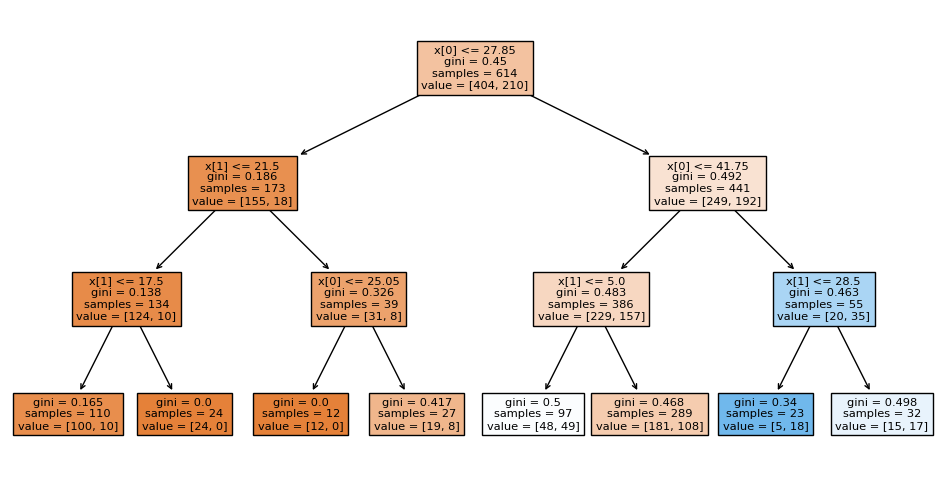

In [ ]:
gini_class = DecisionTreeClassifier(criterion='gini',  max_depth=3) # c параметром ограничивающим глубину
gini_class.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
tree.plot_tree(gini_class, filled = True)
plt.show()

print("Score обучающей выборки:", gini_class.score(X_train, y_train))
print("Score тестовой выборки:", gini_class.score(X_test, y_test))

#Entropy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

Score обучающей выборки: 0.6840390879478827
Score тестовой выборки: 0.6493506493506493


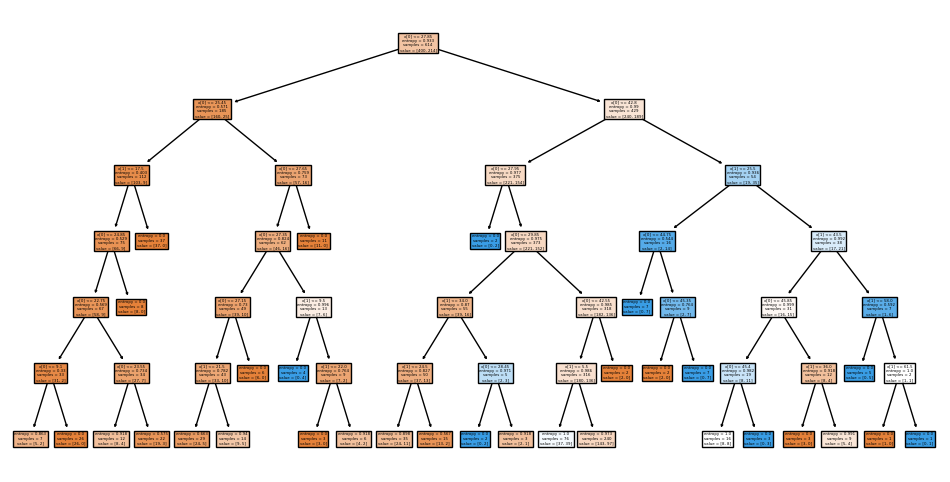

Score обучающей выборки: 0.7052117263843648
Score тестовой выборки: 0.6623376623376623


In [ ]:
entropy_class = DecisionTreeClassifier(criterion='entropy', max_depth=6) # c параметром ограничивающим глубину
entropy_class.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
tree.plot_tree(entropy_class, filled = True)
plt.show()

print("Score обучающей выборки:", entropy_class.score(X_train, y_train))
print("Score тестовой выборки:", entropy_class.score(X_test, y_test))

#log_loss

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

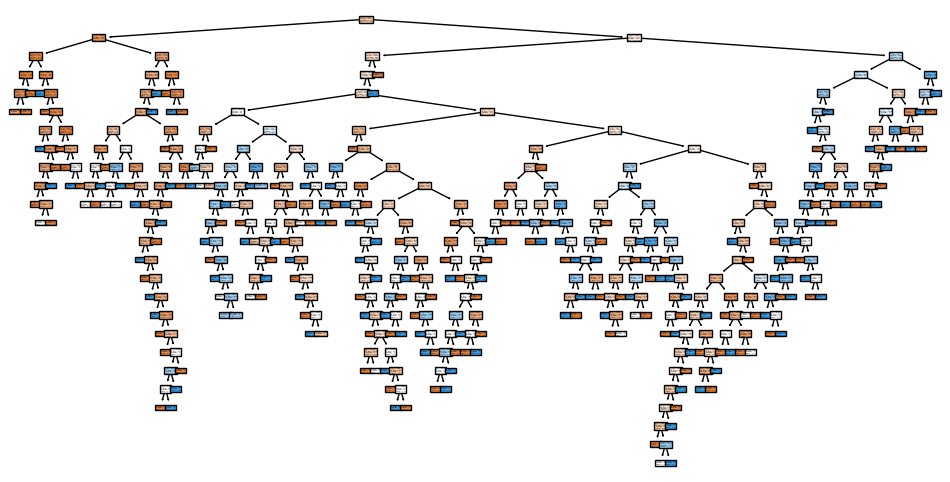

Score обучающей выборки: 0.9592833876221498
Score тестовой выборки: 0.5844155844155844


In [ ]:
dt_class = DecisionTreeClassifier(criterion='log_loss') # c без параметра ограничивающим глубину
dt_class.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
tree.plot_tree(dt_class, filled = True)
plt.show()

print("Score обучающей выборки:", dt_class.score(X_train, y_train))
print("Score тестовой выборки:", dt_class.score(X_test, y_test))